In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import seaborn as sns
import math 

In [2]:
data = pd.read_csv('datos_limpios.csv') 

Accuracy of K-NN classifier on training set: 0.66
Accuracy of K-NN classifier on test set: 0.63
Accuracy of K-NN classifier on training set: 0.66
Accuracy of K-NN classifier on test set: 0.63


<function matplotlib.pyplot.show(close=None, block=None)>

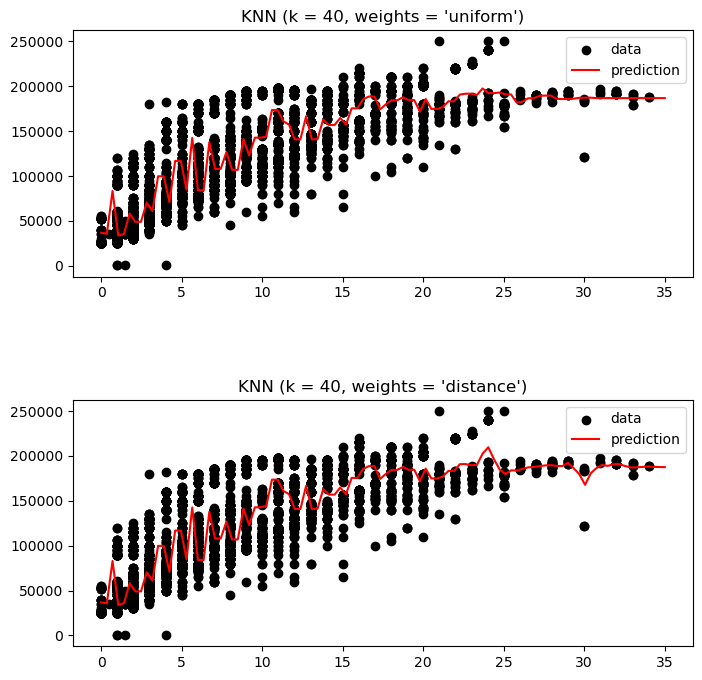

In [3]:
X = data[['Years of Experience']].values
Y = data['Salary'].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.7)
n_neighbors = 40
ls = np.linspace(0, 35, 100)[:, np.newaxis]
plt.figure(figsize=(8, 8))
plt.subplots_adjust(hspace=0.5)
for i, weights in enumerate(['uniform', 'distance']):
    knn = neighbors.KNeighborsRegressor(n_neighbors, weights=weights) 
    y_ = knn.fit(X, Y).predict(ls)
    print('Accuracy of K-NN classifier on training set: {:.2f}'.format(knn.score(X_train, Y_train)))
    print('Accuracy of K-NN classifier on test set: {:.2f}'.format(knn.score(X_test, Y_test)))
     
    # Graficamos los resultados
    plt.subplot(2, 1, i + 1)

    plt.scatter(X, Y, c='k', label='data')
    plt.plot(ls, y_, c='r', label='prediction')
    plt.axis('tight')
    plt.legend()
    plt.title("KNN (k = %i, weights = '%s')" % (n_neighbors,weights))

plt.show # Mostramos la grafica en pantalla

In [4]:
from sklearn.model_selection import GridSearchCV
#parameters = {"n_neighbors": range(1, 10)}
parameters = {"n_neighbors": range(20, 100),"weights": ["uniform", "distance"],}
gridsearch = GridSearchCV(KNeighborsRegressor(), parameters)
gridsearch.fit(X_train, Y_train)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(20, 100),
                         'weights': ['uniform', 'distance']})

In [5]:
gridsearch.best_params_


{'n_neighbors': 95, 'weights': 'distance'}

In [6]:
from sklearn.ensemble import BaggingRegressor

best_k = gridsearch.best_params_["n_neighbors"]
best_weights = gridsearch.best_params_["weights"]
bagged_knn = KNeighborsRegressor(n_neighbors=best_k, weights=best_weights)
bagging_model = BaggingRegressor(bagged_knn, n_estimators=100)
bagging_model.fit(X_train, Y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'.format(bagging_model.score(X_train, Y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'.format(bagging_model.score(X_test, Y_test)))

Accuracy of K-NN classifier on training set: 0.75
Accuracy of K-NN classifier on test set: 0.72


In [7]:
X = data.drop(['Salary'], axis= 1).values
Y = data['Salary'].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.7)

In [8]:
best_k = gridsearch.best_params_["n_neighbors"]
best_weights = gridsearch.best_params_["weights"]
bagged_knn = KNeighborsRegressor(n_neighbors=best_k, weights=best_weights)
bagging_model = BaggingRegressor(bagged_knn, n_estimators=100)
bagging_model.fit(X_train, Y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'.format(bagging_model.score(X_train, Y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'.format(bagging_model.score(X_test, Y_test)))

Accuracy of K-NN classifier on training set: 0.95
Accuracy of K-NN classifier on test set: 0.93
